In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better plots
sns.set(style="darkgrid")



In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)



In [ ]:
"""df.head()         # Pehle 5 rows
df.tail()         # Last 5 rows
df.shape          # Rows aur columns ka size
df.columns        # Column names
df.info()         # Data types + missing values
df.describe()     # Numerical columns ka summary"""
print("head", df.head())
print("tail", df.tail())
print("shape", df.shape)
print("columns", df.columns)
print("info", df.info())
print("describe", df.describe())


head    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

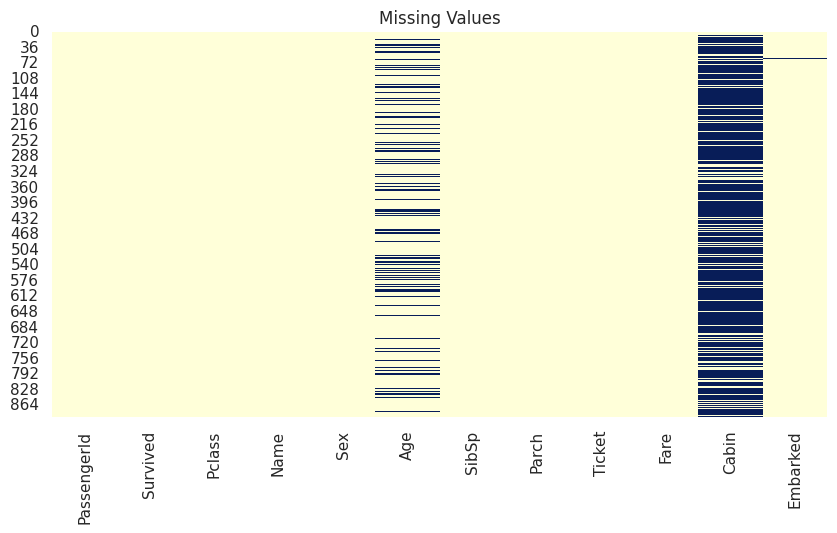

In [ ]:
df.isnull().sum()

# Heatmap for missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values")
plt.show()


In [ ]:
# Numerical aur categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


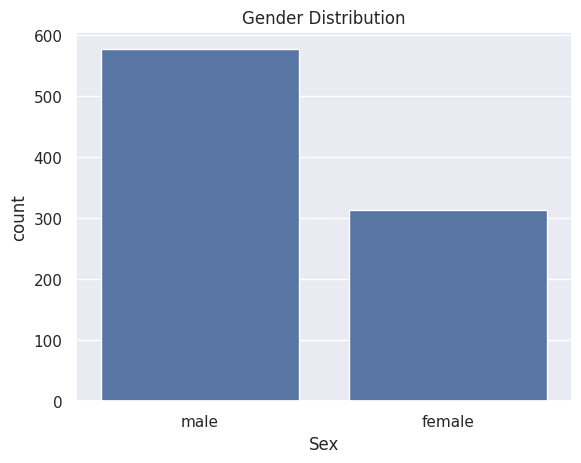

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


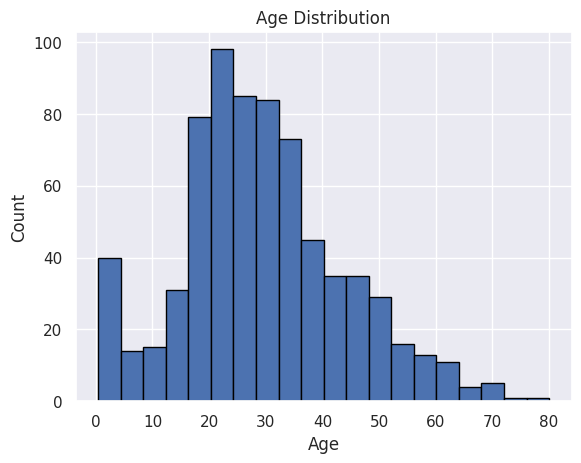

In [ ]:
df['Age'].hist(bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


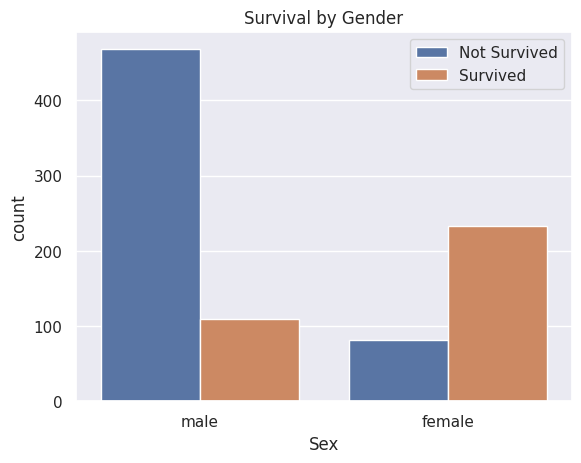

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()


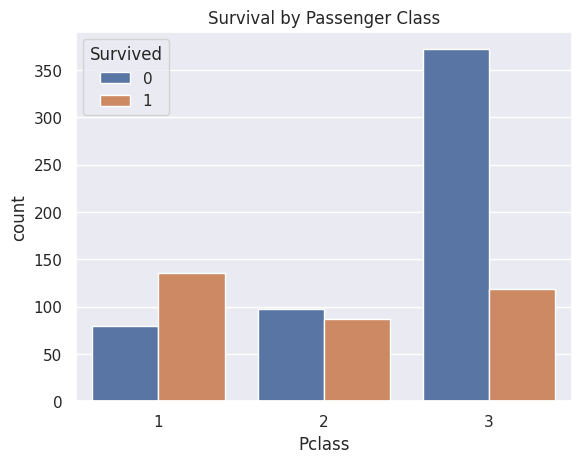

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


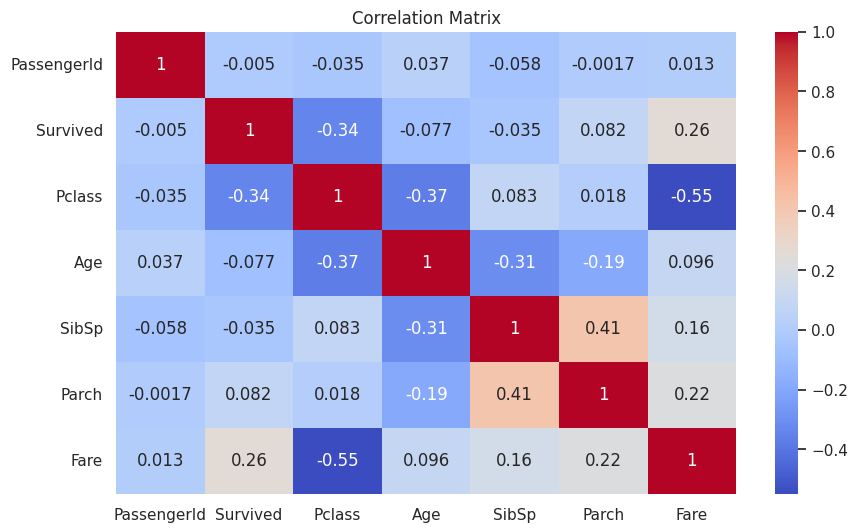

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 📌 Key Insights:

- Females had higher survival rate than males.
- 1st class passengers had higher survival probability.
- Age had some effect, but not very strong correlation with survival.
- There are missing values in 'Age' and 'Cabin' columns.

---

# 🔧 Next Steps (optional):

- Fill missing values (imputation)
- Encode categorical variables
- Train a ML model (logistic regression)


In [ ]:
# Survival rate by gender using the existing df
survival_by_gender = df.groupby('Sex')['Survived'].mean()

# Print the result
print("Survival rate by gender:")
print(survival_by_gender)


Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
# Survival rate by passenger class (Pclass)
survival_by_class = df.groupby('Pclass')['Survived'].mean().sort_index()

# Print the result
print("Survival rate by passenger class:")
print(survival_by_class)


Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
# Check correlation between Age and Survived
correlation = df[['Age', 'Survived']].corr()

print("Correlation between Age and Survival:")
print(correlation)


Correlation between Age and Survival:
               Age  Survived
Age       1.000000 -0.077221
Survived -0.077221  1.000000


In [ ]:
# Check total missing values in each column
missing_values = df.isnull().sum()

# Filter only columns with missing data
missing_values = missing_values[missing_values > 0]

print("Missing values in dataset:")
print(missing_values)


Missing values in dataset:
Age         177
Cabin       687
Embarked      2
dtype: int64


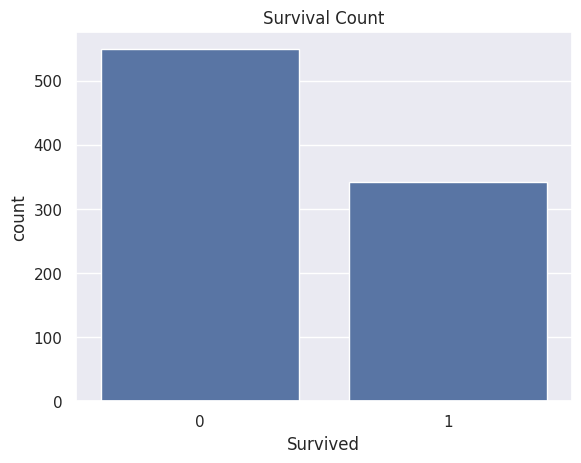

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


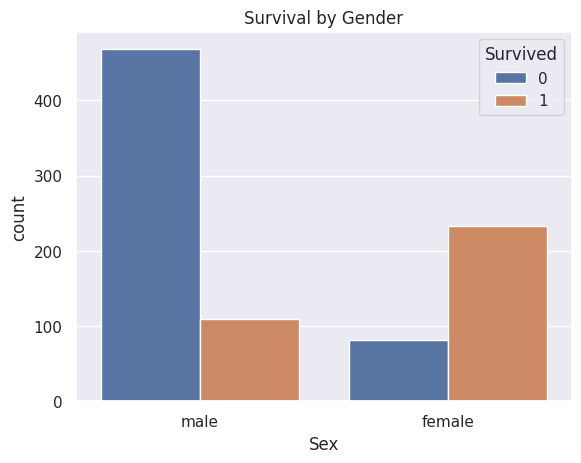

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()


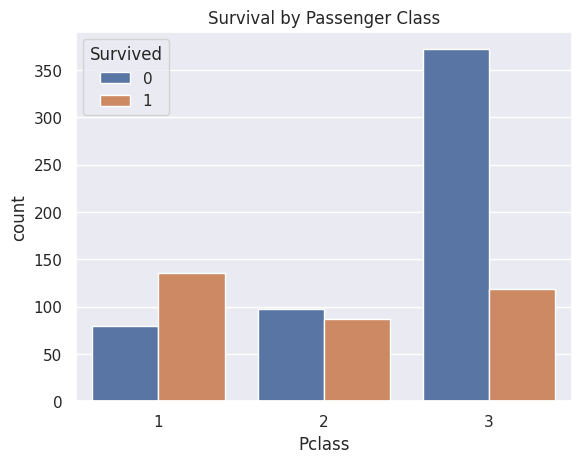

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


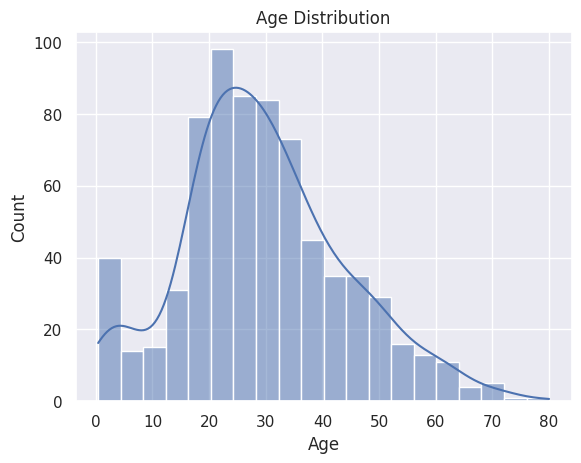

In [ ]:
sns.histplot(df["Age"].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


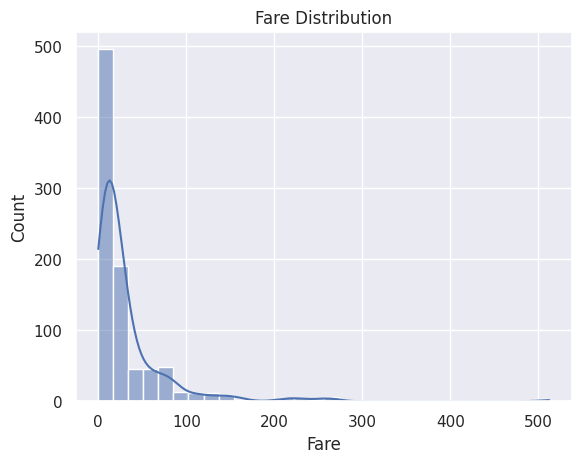

In [ ]:
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


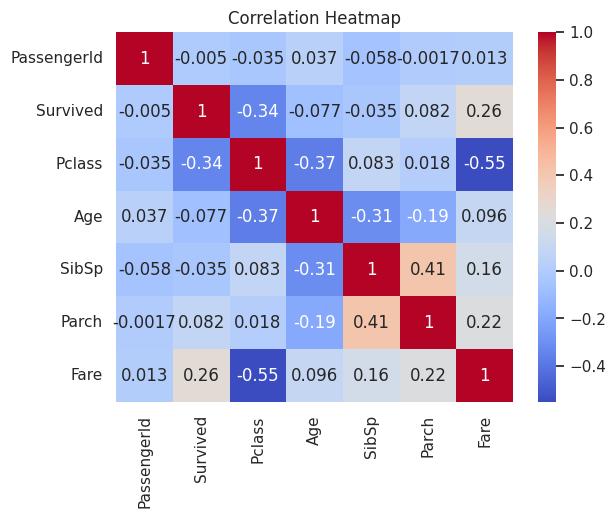

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
